In [22]:
%pylab inline

import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split
from tools import load_household_power_consumption
from pprint import pprint as pp

from IPython.display import display

np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


# Dataset

[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption) 에서 다운받을 수 있습니다.


1. **date**: Date in format dd/mm/yyyy
2. **time**: time in format hh:mm:ss
3. **global_active_power**: household global minute-averaged active power (in kilowatt). Global active power is the power consumed by appliances other than the appliances mapped to Sub Meters. Global active power is the real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.It is basically called wattfull power.
4. **global_reactive_power**: household global minute-averaged reactive power (in kilowatt). Global reactive power is the power which bounces back and froth without any usage or leakage. It is the imaginary power consumption. It is basically called wattless power.
5. **voltage**: minute-averaged voltage (in volt)

6. **global_intensity**: household global minute-averaged current intensity (in ampere). Intensity is magnitude of the power consumed. Also called as strength of current.

7. **sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. **sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. **sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

10. **diff_next**: 다음시간대와 비교하여 difference


하려고 하는 것은 [유효전력(global active power)](http://www.ktword.co.kr/abbr_view.php?m_temp1=4091)를 예측하는 것입니다.


In [42]:
dataset = load_household_power_consumption()
display(dataset.head())


data = dataset.as_matrix()
train_x, test_x, train_y, test_y = train_test_split(data[:, 1:], data[:, 0].reshape(-1, 1), 
                                                    test_size=0.2, random_state=0)

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x :', test_x.shape)
print('test_y :', test_y.shape)

2017-08-14 16:34:46,549 [hybrid-lstm.tool | INFO] Load existing dataset


,active_power,reactive_power,voltage,intensity,sub1,sub2,sub3,diff_next
datetime,,,,,,,,
2010-10-27 13:40:00,0.596,0.000,246.50,2.6,0.0,0.0,0.0,60.0
2010-10-27 13:41:00,0.576,0.000,247.09,2.4,0.0,0.0,1.0,60.0
2010-10-27 13:42:00,0.524,0.084,247.52,2.2,0.0,0.0,1.0,60.0
2010-10-27 13:43:00,0.524,0.084,247.45,2.2,0.0,0.0,0.0,60.0
2010-10-27 13:44:00,0.520,0.086,246.33,2.2,0.0,0.0,1.0,60.0


train_x: (34913, 7)
train_y: (34913, 1)
test_x : (8729, 7)
test_y : (8729, 1)


In [126]:
import queue

        

to_timeseries(dataset).shape

(43294, 30, 8)

## Pearson Correlation

active_power      1.000000
intensity         0.998703
sub3              0.633399
voltage           0.533295
sub1              0.500465
sub2              0.407295
reactive_power    0.209598
diff_next         0.003898
Name: active_power, dtype: float64

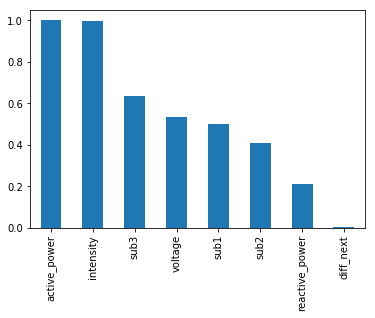

In [3]:
def show_correlation(data):
    d = np.sqrt((data.corr()['active_power']**2)).sort_values(ascending=False)
    display(d)
    d.plot(kind='bar')
    
show_correlation(dataset)

## Scatter Plots

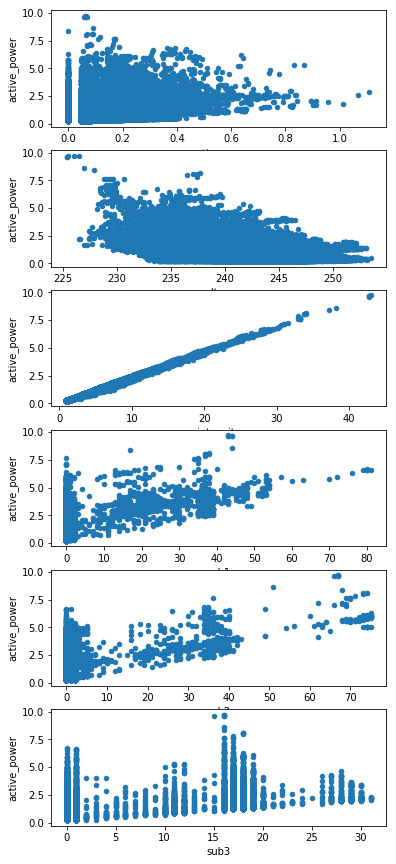

In [14]:
fig, plots = subplots(6, 1)
fig.set_figheight(15)

dataset.plot('reactive_power', 'active_power', kind='scatter', ax=plots[0])
dataset.plot('voltage', 'active_power', kind='scatter', ax=plots[1])
dataset.plot('intensity', 'active_power', kind='scatter', ax=plots[2])
dataset.plot('sub1', 'active_power', kind='scatter', ax=plots[3])
dataset.plot('sub2', 'active_power', kind='scatter', ax=plots[4])
dataset.plot('sub3', 'active_power', kind='scatter', ax=plots[5])